In [1]:
from core.preprocessing import DataManager, retrend_data
from core.arima_models import SumToSumARIMA
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')
from time import time

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dm = DataManager()
dm.load_all_and_split(reindex=True)

In [3]:
prob = SumToSumARIMA(dm.original_train)

In [4]:
ti = time()
prob.train(order=(24,0,0))
tf = time()
print('training took {:1f} seconds'.format(tf - ti))

training took 25.701218 seconds


In [5]:
ti = time()
prob.test(dm.original_dev['total_power'])
tf = time()
print('testing took {:1f} seconds'.format(tf - ti))

testing took 118.079669 seconds


(24815548.75, 24821366.25)

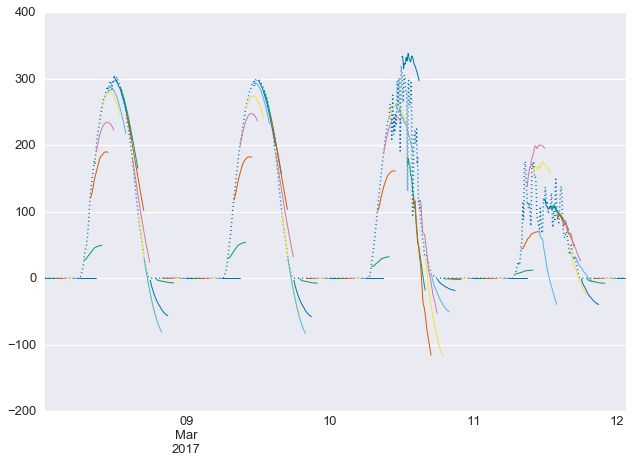

In [6]:
prob.plot_test()
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_xlim(start, end)

In [7]:
prob.calc_mse()

3021.8772582416404